In [253]:
import xgboost
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import time
import sample_generator

%matplotlib notebook

In [284]:
#X,y = make_regression(n_samples=10000,n_features=25,n_informative=3,random_state=11)
X,y = sample_generator.linear(num_samples=1000,dummy_cols=5)
trainX,valX,trainy,valy = train_test_split(X,y,test_size=0.2,shuffle=False)
print(trainX.shape)
#print(trainX[0,:])

(800, 8)


In [263]:
# trainNew = np.zeros((20000,50))
# valNew = np.zeros((5000,50))
# for i in range(50):
#     trainNew[:,i] = trainX[:,50+i]+trainX[:,i]
#     valNew[:,i] = valX[:,50+i]+valX[:,i]
# trainX = np.c_[trainX,trainNew]
# valX = np.c_[valX,valNew]
# print(trainX.shape)
# print(valX.shape)

<IPython.core.display.Javascript object>


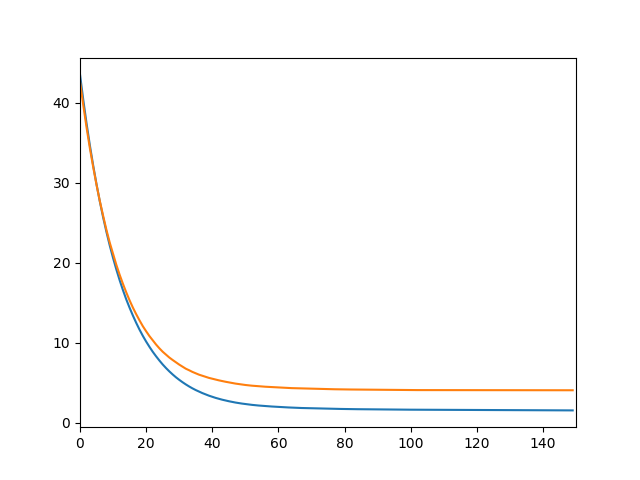

{'train': {'rmse': [1.563495]}, 'val': {'rmse': [4.079827]}}
{'f0': 6, 'f4': 8, 'f5': 3, 'f7': 6, 'f3': 6, 'f6': 6, 'f1': 9, 'f2': 3}
{'f0': 0.36036186666666664, 'f4': 0.27474332375, 'f5': 0.19130406666666666, 'f7': 0.14820758566666667, 'f3': 0.24865613333333333, 'f6': 0.54226355, 'f1': 0.16995425794444446, 'f2': 0.093945912}


In [314]:
%matplotlib notebook
dtrain = xgboost.DMatrix(data=trainX,label=trainy)
dval = xgboost.DMatrix(data=valX,label=valy)
fig = plt.figure()
axis = fig.add_subplot(111)
param={ 'silent':1,
    'eta':0.08,'max_depth':6,'subsample':0.8,
    'objective':'reg:linear'}
evals = [(dtrain,'train'),(dval,'val')]
evals_result={}
train_error=[]
val_error=[]
num_rounds = 150
bst = None
for i in range(num_rounds):
    bst = xgboost.train(param,dtrain,1,evals=evals,evals_result=evals_result,
                   verbose_eval=False)
    ptrain = bst.predict(dtrain,output_margin=True)
    pval = bst.predict(dval,output_margin=True)
    dtrain.set_base_margin(ptrain)
    dval.set_base_margin(pval)
    train_error.append(evals_result['train']['rmse'][0])
    val_error.append(evals_result['val']['rmse'][0])
    axis.clear()
    axis.set_xlim(right=num_rounds)
    axis.plot(np.arange(len(train_error)),train_error)
    axis.plot(np.arange(len(val_error)),val_error)
    fig.canvas.draw()
print(evals_result)
print(bst.get_score(importance_type='weight'))
print(bst.get_score(importance_type='gain'))